In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

2024-04-06 12:32:43.758093: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-06 12:32:43.788195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 12:32:43.788234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 12:32:43.789428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-06 12:32:43.794264: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-06 12:32:43.794759: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
from sklearn.model_selection import train_test_split

### Pré-Processamento e visualização das Imagens

In [3]:
def carregar_imagens(caminho, tamanho=(250,250)):
    imagens = []
    labels = []
    for pasta in os.listdir(caminho):
        classe = os.path.basename(pasta)
        for arquivo in os.listdir(os.path.join(caminho, pasta)):
            imagem = cv2.imread(os.path.join(caminho, pasta, arquivo))
            imagem = cv2.resize(imagem, tamanho)
            imagens.append(imagem)
            labels.append(int(classe))
    return np.array(imagens) / 255.0 , np.array(labels)

In [4]:
caminho = "./dataset"
imagens, labels = carregar_imagens(caminho)

In [5]:
imagens_treino, imagens_teste, labels_treino, labels_teste = train_test_split(imagens, labels, test_size=0.3, random_state=45)

In [6]:
np.savez('dataset.npz', imagens_treino=imagens_treino, labels_treino=labels_treino, imagens_teste=imagens_teste, labels_teste=labels_teste)

### Carregando os Dados

In [3]:
data = np.load('dataset.npz')
imagens_treino = data['imagens_treino']
labels_treino = data['labels_treino']
imagens_teste = data['imagens_teste']
labels_teste = data['labels_teste']

In [4]:
nomes_classes = ['pessoas', 'passaros', 'cachorro']

In [6]:
print(imagens_teste)

[[[[0.26666667 0.17254902 0.09411765]
   [0.2627451  0.16470588 0.09411765]
   [0.25882353 0.18431373 0.0745098 ]
   ...
   [0.1254902  0.16470588 0.11372549]
   [0.12941176 0.18039216 0.11764706]
   [0.1254902  0.17254902 0.12156863]]

  [[0.12941176 0.14901961 0.11372549]
   [0.14901961 0.17254902 0.12941176]
   [0.18431373 0.19215686 0.14509804]
   ...
   [0.14509804 0.18823529 0.09411765]
   [0.1372549  0.18823529 0.09411765]
   [0.1254902  0.16862745 0.08627451]]

  [[0.21960784 0.22352941 0.18823529]
   [0.22745098 0.23137255 0.19215686]
   [0.22352941 0.22745098 0.19215686]
   ...
   [0.16470588 0.19215686 0.01568627]
   [0.15294118 0.2        0.01568627]
   [0.14509804 0.18823529 0.01568627]]

  ...

  [[0.14117647 0.2        0.08235294]
   [0.10196078 0.2        0.00784314]
   [0.09019608 0.24313725 0.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         0.96862745 0.9254902 ]]

  [[0.43529412 0.36078431 0.21568627]
   [0.4

In [7]:
from PIL import Image

In [8]:
labels_teste.shape

(117,)

In [9]:
labels_teste

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 0])

In [10]:
def visualiza_imagens(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

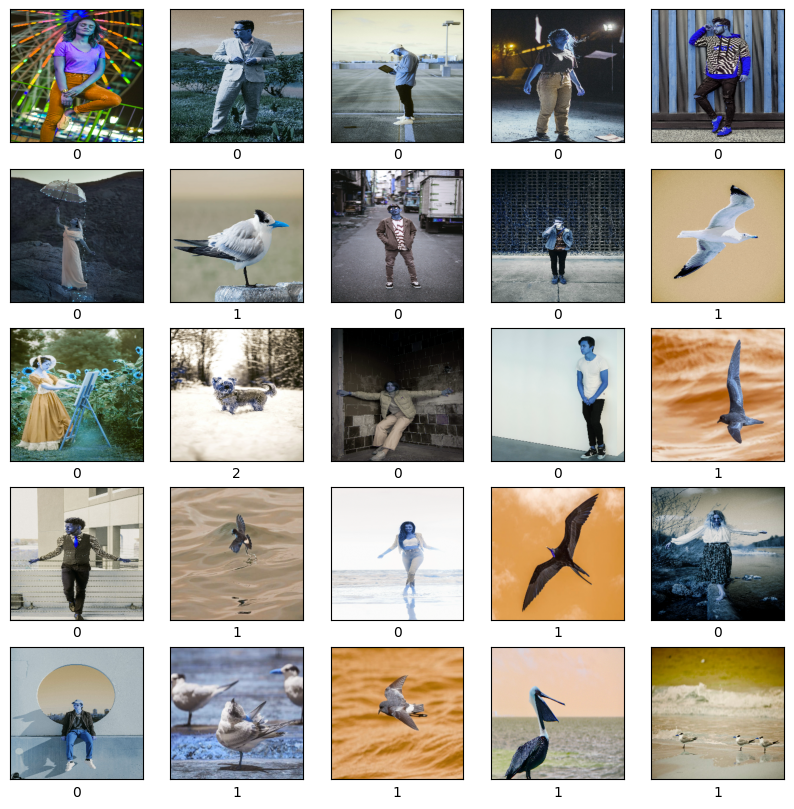

In [11]:
visualiza_imagens(imagens_teste, labels_teste)

### Construção do Modelo

In [12]:
# Modelo

# Criar o objeto de sequência de camadas
modelo = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(250,250,3))) # (32,32) é os pixel da imagem e o 3 é o rgb
modelo.add(layers.MaxPooling2D((2,2)))

# Adicionando o segundo bloco de convolução e max pooling (camada intermediária)
modelo.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))

modelo.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
modelo.add(layers.MaxPooling2D((2,2)))




In [13]:
modelo.add(layers.Flatten())
modelo.add(layers.Dense(128, activation='relu'))
modelo.add(layers.Dense(3, activation='softmax'))

In [14]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

In [15]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [16]:
%%time
history = modelo.fit(imagens_treino,
                    labels_treino,
                    epochs=15,
                    validation_data=(imagens_teste, labels_teste))

Epoch 1/15


2024-04-06 12:34:09.546794: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 202500000 exceeds 10% of free system memory.
2024-04-06 12:34:10.529183: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.
2024-04-06 12:34:11.591899: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.


1/9 [==>...........................] - ETA: 17s - loss: 1.1077 - accuracy: 0.2812

2024-04-06 12:34:11.998627: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.
2024-04-06 12:34:13.020318: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 256000000 exceeds 10% of free system memory.


9/9 [==============================] - 14s 2s/step - loss: 3.5241 - accuracy: 0.3926 - val_loss: 0.9966 - val_accuracy: 0.5726
Epoch 2/15
9/9 [==============================] - 13s 1s/step - loss: 0.9663 - accuracy: 0.5259 - val_loss: 0.8997 - val_accuracy: 0.5726
Epoch 3/15
9/9 [==============================] - 13s 1s/step - loss: 0.8449 - accuracy: 0.6556 - val_loss: 0.6526 - val_accuracy: 0.7778
Epoch 4/15
9/9 [==============================] - 13s 1s/step - loss: 0.6405 - accuracy: 0.7519 - val_loss: 0.7180 - val_accuracy: 0.7521
Epoch 5/15
9/9 [==============================] - 13s 1s/step - loss: 0.6032 - accuracy: 0.7704 - val_loss: 0.5853 - val_accuracy: 0.8120
Epoch 6/15
9/9 [==============================] - 13s 1s/step - loss: 0.4279 - accuracy: 0.8481 - val_loss: 0.5458 - val_accuracy: 0.7607
Epoch 7/15
9/9 [==============================] - 13s 1s/step - loss: 0.3632 - accuracy: 0.8630 - val_loss: 0.9279 - val_accuracy: 0.8120
Epoch 8/15
9/9 [=============================

### Avaliação do Modelo

In [17]:
def prever(predict):
    classe_prevista = np.argmax(predict)
    return nomes_classes[classe_prevista]

In [18]:
erro_teste, acc_teste = modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

4/4 - 1s - loss: 1.2202 - accuracy: 0.7949 - 961ms/epoch - 240ms/step


In [19]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.7948718070983887


In [20]:
def previl_image(image):
    imagem_verifica = Image.open(image)
    imagem_verifica = imagem_verifica.resize((250,250))
    plt.figure(figsize = (1,1))
    plt.imshow(imagem_verifica)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    print(imagem_verifica.size)
    imagem_verifica_np = np.array(imagem_verifica) / 255.0
    imagem_verifica_np = np.expand_dims(imagem_verifica_np, axis=0)

    predict = modelo.predict(imagem_verifica_np)
    print(predict)
    return prever(predict)

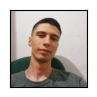

(250, 250)
1/1 [==============================] - 0s 152ms/step
[[0.97109455 0.02091767 0.00798775]]


'pessoas'

In [21]:
previl_image("/home/mateus/Imagens/file.jpeg")

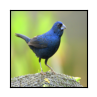

(250, 250)
1/1 [==============================] - 0s 25ms/step
[[4.694005e-04 9.574876e-01 4.204311e-02]]


'passaros'

In [22]:
previl_image("/home/mateus/Imagens/Tiziu.jpg")

9/9 [==============================] - 2s 233ms/step


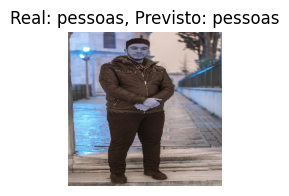

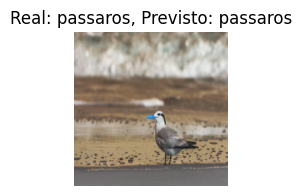

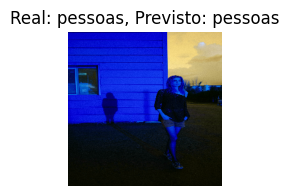

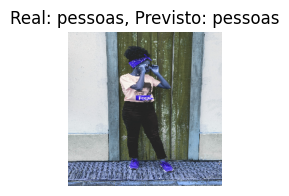

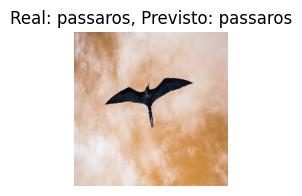

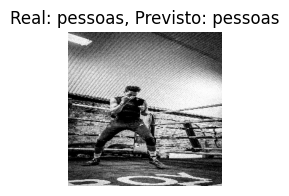

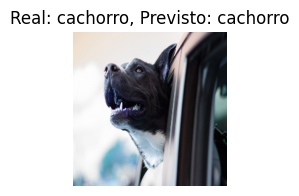

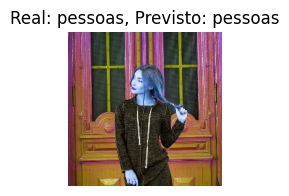

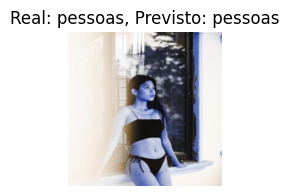

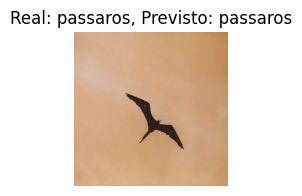

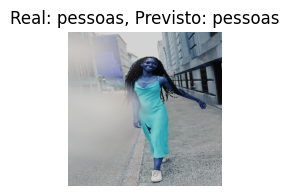

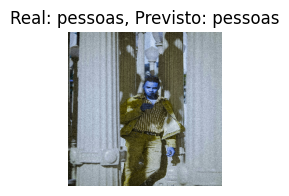

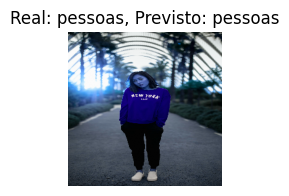

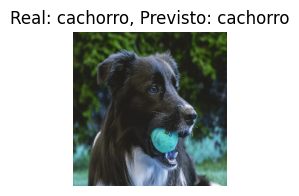

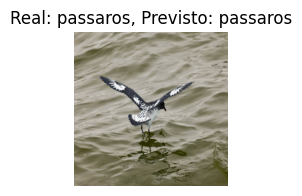

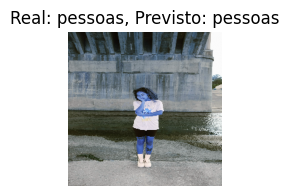

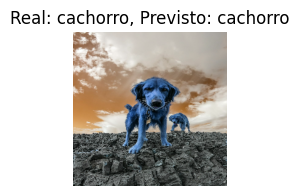

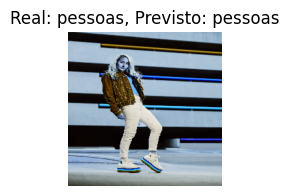

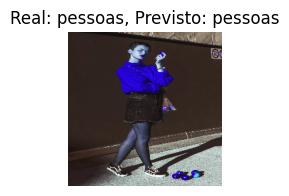

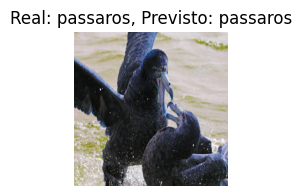

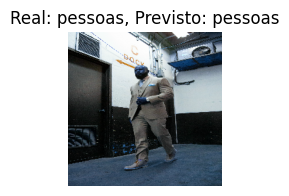

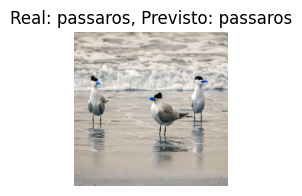

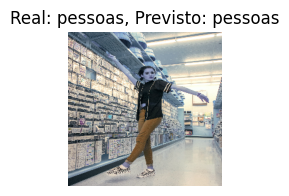

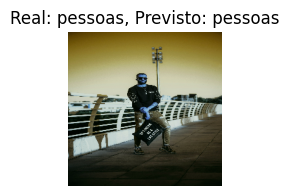

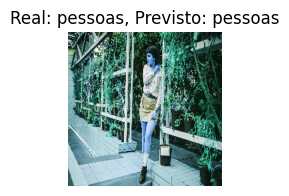

In [23]:
previsoes_treino = modelo.predict(imagens_treino)

# Mostrando os resultados das previsões
for i in range(25):
    imagem = imagens_treino[i]
    label_real = labels_treino[i]
    label_prevista = np.argmax(previsoes_treino[i])
    classe_prevista = nomes_classes[label_prevista]
    
    plt.figure(figsize=(2, 2))
    plt.imshow(imagem)
    plt.title(f'Real: {nomes_classes[label_real]}, Previsto: {classe_prevista}')
    plt.axis('off')
    plt.show()

In [24]:
modelo.save("modelo")

INFO:tensorflow:Assets written to: modelo/assets


INFO:tensorflow:Assets written to: modelo/assets
